## Plot Graphs

In [1]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

## Undirected Graph

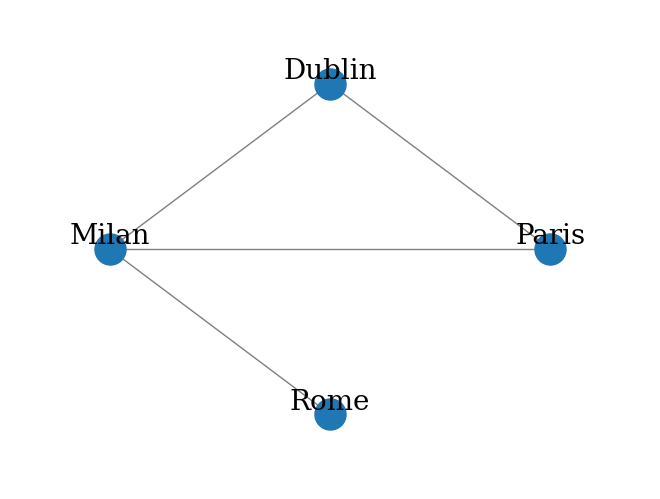

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [3]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Milan', 'Rome', 'Paris', 'Dublin']
E = [('Milan', 'Dublin'), ('Milan', 'Paris'), ('Milan', 'Rome'), ('Paris', 'Dublin')]


In [4]:
{G.degree(v): v for v in G.nodes}

{3: 'Milan', 1: 'Rome', 2: 'Dublin'}

In [5]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order: 4
Graph Size: 4
Degree for nodes: {'Milan': 3, 'Rome': 1, 'Paris': 2, 'Dublin': 2}
Neighbors for nodes: {'Milan': ['Dublin', 'Paris', 'Rome'], 'Rome': ['Milan'], 'Paris': ['Milan', 'Dublin'], 'Dublin': ['Milan', 'Paris']}


In [6]:
ego_graph_milan = nx.ego_graph(G, "Milan")
print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")

Nodes: ['Milan', 'Rome', 'Paris', 'Dublin']
Edges: [('Milan', 'Dublin'), ('Milan', 'Paris'), ('Milan', 'Rome'), ('Paris', 'Dublin')]


In [7]:
new_nodes = {'London', 'Madrid'}
new_edges = [('London','Rome'), ('Madrid','Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Milan', 'Rome', 'Paris', 'Dublin', 'London', 'Madrid']
E = [('Milan', 'Dublin'), ('Milan', 'Paris'), ('Milan', 'Rome'), ('Rome', 'London'), ('Paris', 'Dublin'), ('Paris', 'Madrid')]


In [8]:
node_remove = {'London', 'Madrid'}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Milan', 'Rome', 'Paris', 'Dublin']
E = [('Milan', 'Dublin'), ('Milan', 'Paris'), ('Milan', 'Rome'), ('Paris', 'Dublin')]


In [9]:
node_edges = [('Milan','Dublin'), ('Milan','Paris')]
G.remove_edges_from(node_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Milan', 'Rome', 'Paris', 'Dublin']
E = [('Milan', 'Rome'), ('Paris', 'Dublin')]


In [10]:
print(nx.to_edgelist(G))

[('Milan', 'Rome', {}), ('Paris', 'Dublin', {})]


In [11]:
print(nx.to_pandas_adjacency(G))

        Milan  Rome  Paris  Dublin
Milan     0.0   1.0    0.0     0.0
Rome      1.0   0.0    0.0     0.0
Paris     0.0   0.0    0.0     1.0
Dublin    0.0   0.0    1.0     0.0


## Directed Graph

In [12]:
import networkx as nx
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

  source  target
0  Milan  Dublin
1  Milan    Rome
2  Paris   Milan
3  Paris  Dublin
        Milan  Rome  Paris  Dublin
Milan     0.0   1.0    0.0     1.0
Rome      0.0   0.0    0.0     0.0
Paris     1.0   0.0    0.0     1.0
Dublin    0.0   0.0    0.0     0.0


In [13]:
print(f"Indegree for nodes: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"Outegree for nodes: { {v: G.out_degree(v) for v in G.nodes} }")

Indegree for nodes: {'Milan': 1, 'Rome': 1, 'Paris': 0, 'Dublin': 2}
Outegree for nodes: {'Milan': 2, 'Rome': 0, 'Paris': 2, 'Dublin': 0}


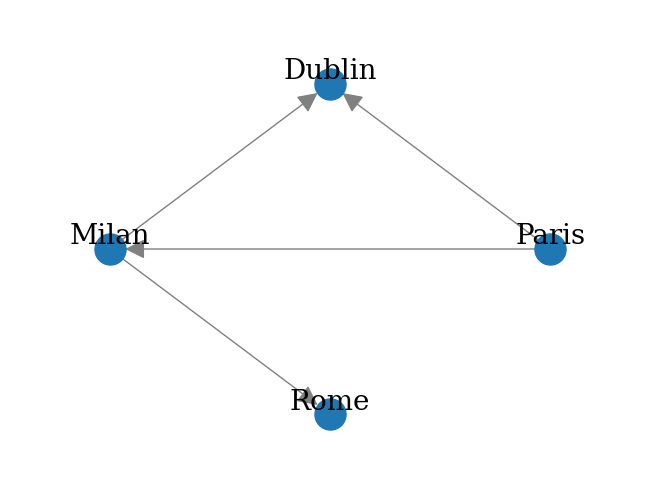

In [14]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

## Weighted Directed Graph

  source  target  weight
0  Milan    Rome       5
1  Milan  Dublin      19
2  Paris  Dublin      11
3  Paris   Milan       8
        Milan  Rome  Paris  Dublin
Milan     0.0   5.0    0.0    19.0
Rome      0.0   0.0    0.0     0.0
Paris     8.0   0.0    0.0    11.0
Dublin    0.0   0.0    0.0     0.0


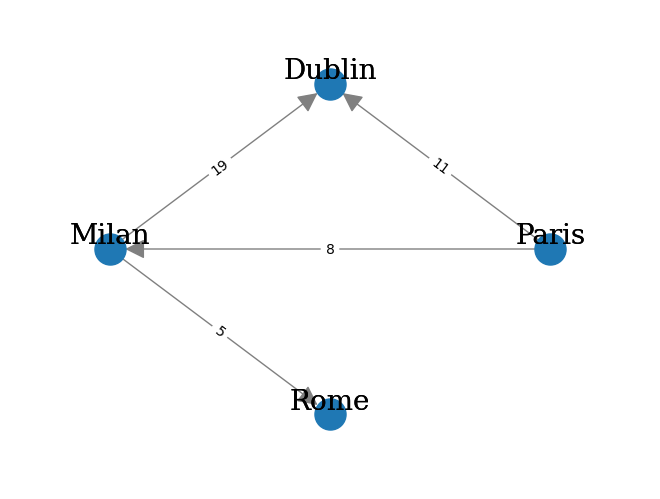

In [15]:
import networkx as nx
G = nx.MultiDiGraph()
V = {'Paris', 'Dublin','Milan', 'Rome'}
E = [ ('Paris','Dublin', 11), ('Paris','Milan', 8),
     ('Milan','Rome', 5),('Milan','Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500, plot_weight=True)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

## Bipartite Graph

In [16]:
n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 ==0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 ==1]
iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),  
    np.random.choice(top_nodes, n_edges))
edges = pd.DataFrame([
    {"source": a, "target": b} for a, b in iter_edges])
B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

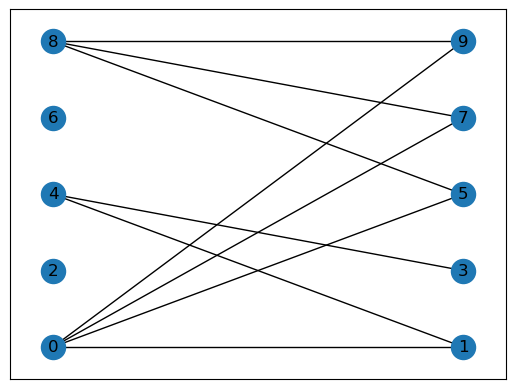

In [17]:
from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos)

## Multi Graph

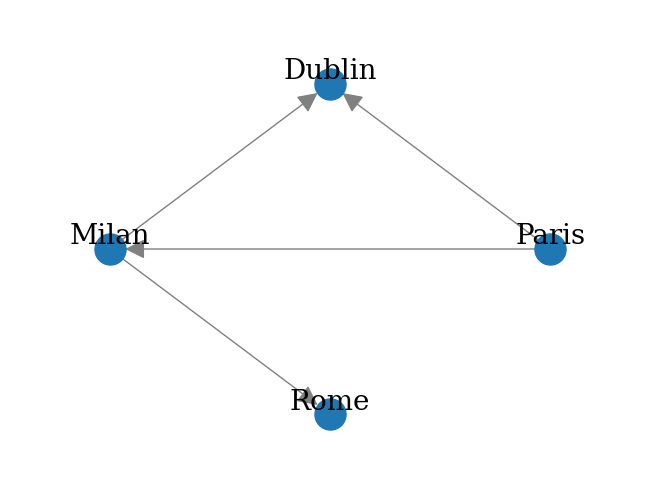

In [18]:
import networkx as nx
directed_multi_graph = nx.MultiDiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome'), ('Milan','Rome')]
directed_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)

draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)